# Coffea and Awkward

**March 15, 2023 at Beijing**

In [1]:
import awkward as ak
import uproot
import hist
import os
import numpy as np
from imp import reload #每次修改调用函数后可以更新
import correctionlib, rich
import matplotlib.pyplot as plt
import sys
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd

/tmp/ipykernel_10207/3501001846.py:6: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload #每次修改调用函数后可以更新


In [108]:
# keys = ['dataC_ele','dataD_ele','zg0_22','zg1_22', 'zg2_22','zg3_22','tt_22','zz_22', 'ww_22', 'wz_22',]#'dy_22']
# data_keys = ["dataC_ele", "dataD_ele"]
# mc_keys = ['zg0_22','zg1_22', 'zg2_22','zg3_22','tt_22','zz_22', 'ww_22', 'wz_22',]#'dy_22'

keys = ['dataC_muon','dataD_muon','zg0_22','zg1_22', 'zg2_22','zg3_22','tt_22','zz_22', 'ww_22', 'wz_22',]#'dy_22']
data_keys = ["dataC_muon", "dataD_muon"]
mc_keys = ['zg0_22','zg1_22', 'zg2_22','zg3_22','tt_22','zz_22', 'ww_22', 'wz_22',]


In [17]:
def load_event_dict(file_prefix, keys):
    data_subkeys = ['photon_pt','photon_eta','ele1_pt','ele2_pt','ele1_eta','ele2_eta','ele_mass','gee_mass','npvsGood','Rho_Calo','Rho_tracker','photon_r9','photon_seedGain','run']
    other_subkeys = data_subkeys + ['generator_weight', 'event_weight']#'LHEPdfWeight','LHEScaleWeight','PSWeight','GenDressedLepton','GenIsolatedPhoton','gen_gmumu','gen_mumu' 'gen_muon1_pt','gen_muon2_pt','gen_muon1_eta','gen_muon2_eta','gen_gmumu','gen_mumu','LHEPdfWeight','LHEScaleWeight',,'gen_gmumu'
    # other_subkeys = data_subkeys
    #   
    event_dict = {}
    for key in keys:
        subkeys = other_subkeys if 'data' not in key else data_subkeys
        event_dict[key] = {}
        for subkey in subkeys:
            event_dict[key][subkey] = ak.from_parquet(f'{file_prefix}_{key}_{subkey}.parquet')
    return event_dict


# 读取数据
event_final = load_event_dict('selection_ele_file/v2/A/event_ele_final', keys)

event_final

{'dataC_ele': {'photon_pt': <Array [50.8, 33.1, 32.1, ... 62.5, 30.1, 87.3] type='1017 * ?float32'>,
  'photon_eta': <Array [0.858, 0.39, -0.829, ... 0.0832, 1.24] type='1017 * ?float32'>,
  'ele1_pt': <Array [74.4, 57.8, 40.7, ... 53.8, 95.9, 52.8] type='1017 * ?float32'>,
  'ele2_pt': <Array [37.6, 35.8, 34.6, ... 24.9, 45.9, 52.5] type='1017 * ?float32'>,
  'ele1_eta': <Array [-0.184, 0.0891, ... 0.0735, -1.36] type='1017 * ?float32'>,
  'ele2_eta': <Array [0.471, -0.327, ... -0.553, -1.81] type='1017 * ?float32'>,
  'ele_mass': <Array [100, 90.8, 89.1, ... 88.1, 89.6, 90.8] type='1017 * ?float32'>,
  'gee_mass': <Array [[180], [131], ... [102], [422]] type='1017 * option[var * ?float32]'>,
  'npvsGood': <Array [27, 40, 17, 31, 28, ... 25, 33, 21, 33] type='1017 * ?uint8'>,
  'Rho_Calo': <Array [14.7, 14.2, 10.2, ... 22.2, 9.8, 15.1] type='1017 * ?float32'>,
  'Rho_tracker': <Array [17, 22.8, 9.91, ... 22.3, 11.2, 21.3] type='1017 * ?float32'>,
  'photon_r9': <Array [1.01, 0.727, 0.

In [18]:
# 将 "data1", "data2", "data3", "data4" 这四个 key 的内容合并为 "data" 这个 key
event_final["data"] = {}
info_keys = list(event_final["dataC_ele"].keys())

# info_keys = list(event_final["dataC_muon"].keys())

# 遍历每个信息键
for info_key in info_keys:
    # 从 event_final 中提取 "data1", "data2", "data3", "data4" 这四个 key 的数据
    data_to_concatenate = [event_final[data_key][info_key] for data_key in data_keys]

    # 使用 ak.concatenate 将数据连接在一起
    event_final["data"][info_key] = ak.concatenate(data_to_concatenate)



In [19]:
del event_final["dataC_ele"]
del event_final["dataD_ele"]
# del event_final["dataC_muon"]
# del event_final["dataD_muon"]
event_final

{'zg0_22': {'photon_pt': <Array [37.3, 41.1, 30.6, ... 35.1, 31.8, 41.6] type='23579 * ?float32'>,
  'photon_eta': <Array [-0.681, -0.613, ... -1.14, 0.876] type='23579 * ?float32'>,
  'ele1_pt': <Array [32.7, 53.6, 57.2, ... 94.2, 42.7, 59.2] type='23579 * ?float32'>,
  'ele2_pt': <Array [26.6, 38.1, 33.6, 21.4, ... 22, 30, 35] type='23579 * ?float32'>,
  'ele1_eta': <Array [-2.05, -0.0661, 1.13, ... 1.84, 1.8] type='23579 * ?float32'>,
  'ele2_eta': <Array [0.104, 0.542, 1.39, ... 0.431, 0.97] type='23579 * ?float32'>,
  'ele_mass': <Array [85.6, 85.6, 88.4, ... 90.3, 89.2, 92.6] type='23579 * ?float32'>,
  'gee_mass': <Array [[116], [146], ... [202], [123]] type='23579 * option[var * ?float32]'>,
  'npvsGood': <Array [21, 39, 37, 44, 31, ... 25, 33, 18, 35] type='23579 * ?uint8'>,
  'Rho_Calo': <Array [8.54, 13.3, 11.4, ... 13.1, 8.97, 16.3] type='23579 * ?float32'>,
  'Rho_tracker': <Array [10.9, 19.3, 22.1, ... 17.7, 14.4, 21.9] type='23579 * ?float32'>,
  'photon_r9': <Array [1.0

In [109]:
def load_event_dict(file_prefix, keys):
    # data_subkeys = ['photon_pt', 'photon_eta', 'muon1_pt', 'muon2_pt', 'muon1_eta', 'muon2_eta', 'mu_mass','gmumu_mass','npvsGood','Rho_Calo','Rho_tracker']
    data_subkeys = ['photon_pt', 'photon_eta', 'muon1_pt', 'muon2_pt', 'muon1_eta', 'muon2_eta', 'mu_mass','gmumu_mass','photon_endcap','photon_barrel','npvsGood','Rho_Calo','Rho_tracker','photon_r9','photon_seedGain','run']#,,,,'dr_lg','charge1','charge2'
    other_subkeys = data_subkeys + ['generator_weight', 'event_weight']#'LHEPdfWeight','LHEScaleWeight','PSWeight','GenDressedLepton','GenIsolatedPhoton','gen_gmumu','gen_mumu' 'gen_muon1_pt','gen_muon2_pt','gen_muon1_eta','gen_muon2_eta','gen_gmumu','gen_mumu','LHEPdfWeight','LHEScaleWeight',,'gen_gmumu'
    # other_subkeys = data_subkeys
    #   
    event_dict = {}
    for key in keys:
        subkeys = other_subkeys if 'data' not in key else data_subkeys
        event_dict[key] = {}
        for subkey in subkeys:
            event_dict[key][subkey] = ak.from_parquet(f'{file_prefix}_{key}_{subkey}.parquet')
    return event_dict
# keys = ['dataC_muon','dataD_muon','zg0_22','zg1_22', 'zg2_22','zg3_22','tt_22','zz_22', 'ww_22', 'wz_22']
# # 读取数据
event_final = load_event_dict('selection_muon_file/v2/A/event_muon_final', keys)

event_final

{'dataC_muon': {'photon_pt': <Array [40.1, 44, 47.5, ... 123, 46.3, 31.7] type='1215 * ?float32'>,
  'photon_eta': <Array [0.795, 1.1, 0.507, ... 1.03, -1.29] type='1215 * ?float32'>,
  'muon1_pt': <Array [45.1, 71.4, 55.6, ... 74.5, 93.2, 57.2] type='1215 * ?float32'>,
  'muon2_pt': <Array [38, 41.5, 41.6, ... 60, 29.1, 34.2] type='1215 * ?float32'>,
  'muon1_eta': <Array [0.855, 1.26, 0.577, ... -1.13, 0.79] type='1215 * ?float32'>,
  'muon2_eta': <Array [1.51, 1.5, -0.0268, ... -0.118, 1.83] type='1215 * ?float32'>,
  'mu_mass': <Array [87, 81.3, 91, 89, ... 91, 79.2, 90.8] type='1215 * ?float32'>,
  'gmumu_mass': <Array [123, 155, 150, 117, ... 285, 239, 219] type='1215 * ?float32'>,
  'photon_endcap': <Array [False, False, False, ... False, False] type='1215 * ?bool'>,
  'photon_barrel': <Array [True, True, True, ... True, True, True] type='1215 * ?bool'>,
  'npvsGood': <Array [21, 16, 30, 30, 21, ... 22, 31, 21, 32] type='1215 * ?uint8'>,
  'Rho_Calo': <Array [11.3, 7.82, 16.1, .

In [110]:
# 将 "data1", "data2", "data3", "data4" 这四个 key 的内容合并为 "data" 这个 key
event_final["data"] = {}

info_keys = list(event_final["dataC_muon"].keys())

# 遍历每个信息键
for info_key in info_keys:
    # 从 event_final 中提取 "data1", "data2", "data3", "data4" 这四个 key 的数据
    data_to_concatenate = [event_final[data_key][info_key] for data_key in data_keys]

    # 使用 ak.concatenate 将数据连接在一起
    event_final["data"][info_key] = ak.concatenate(data_to_concatenate)



In [111]:
del event_final["dataC_muon"]
del event_final["dataD_muon"]
event_final

{'zg0_22': {'photon_pt': <Array [31.3, 30.2, 46.3, ... 33.9, 31.2, 37.4] type='33590 * ?float32'>,
  'photon_eta': <Array [-1.8, -0.994, -1.25, ... 1.95, -0.47] type='33590 * ?float32'>,
  'muon1_pt': <Array [59, 57.1, 72.5, ... 57.8, 32.9, 62.3] type='33590 * ?float32'>,
  'muon2_pt': <Array [31.8, 37.2, 30.1, ... 38.8, 26.7, 34.5] type='33590 * ?float32'>,
  'muon1_eta': <Array [-0.978, -0.741, -1.52, ... 2.16, -2.03] type='33590 * ?float32'>,
  'muon2_eta': <Array [-1.84, -0.117, ... 0.0538, -1.83] type='33590 * ?float32'>,
  'mu_mass': <Array [94, 91.2, 91.9, ... 92.7, 89.6, 92.8] type='33590 * ?float32'>,
  'gmumu_mass': <Array [133, 131, 160, 223, ... 135, 134, 166] type='33590 * ?float32'>,
  'photon_endcap': <Array [True, False, False, ... True, False] type='33590 * ?bool'>,
  'photon_barrel': <Array [False, True, True, ... False, True] type='33590 * ?bool'>,
  'npvsGood': <Array [23, 25, 30, 18, 17, ... 40, 26, 17, 31] type='33590 * ?uint8'>,
  'Rho_Calo': <Array [8.92, 6.27, 

## ABCD method endcap & barrel

In [112]:
def load_event_dict(file_prefix, keys):
    data_subkeys = ['photon_pt', 'photon_eta', 'muon1_pt', 'muon2_pt', 'muon1_eta', 'muon2_eta', 'mu_mass','gmumu_mass','photon_endcap','photon_barrel']#,'npvsGood','Rho_Calo','Rho_tracker',,'dr_lg','charge1','charge2'
    # data_subkeys = ['photon_pt','photon_eta','ele1_pt','ele2_pt','ele1_eta','ele2_eta','ele_mass','gee_mass','photon_endcap','photon_barrel']#,
    other_subkeys = data_subkeys + ['generator_weight', 'event_weight']#'LHEPdfWeight','LHEScaleWeight','PSWeight','GenDressedLepton','GenIsolatedPhoton','gen_gmumu','gen_mumu' 'gen_muon1_pt','gen_muon2_pt','gen_muon1_eta','gen_muon2_eta','gen_gmumu','gen_mumu','LHEPdfWeight','LHEScaleWeight',,'gen_gmumu'
    #   
    event_dict = {}
    for key in keys:
        subkeys = other_subkeys if 'data' not in key else data_subkeys
        event_dict[key] = {}
        for subkey in subkeys:
            event_dict[key][subkey] = ak.from_parquet(f'{file_prefix}_{key}_{subkey}.parquet')
    return event_dict
# Muon
event_B = load_event_dict('selection_muon_file/v2/B/event_muon_final', data_keys)
event_C = load_event_dict('selection_muon_file/v2/C/event_muon_final', data_keys)
event_D = load_event_dict('selection_muon_file/v2/D/event_muon_final', data_keys)
# Electron
# event_B = load_event_dict('selection_ele_file/v2/B/event_ele_final', data_keys)
# event_C = load_event_dict('selection_ele_file/v2/C/event_ele_final', data_keys)
# event_D = load_event_dict('selection_ele_file/v2/D/event_ele_final', data_keys)

In [113]:
# 合并key
event_B["data"] = {}
event_C["data"] = {}
event_D["data"] = {}

# info_keys = list(event_B["dataC_ele"].keys())
info_keys = list(event_B["dataC_muon"].keys())

# 遍历每个信息键
for info_key in info_keys:
    # 从 event_final 中提取 "data1", "data2", "data3", "data4" 这四个 key 的数据
    data_to_concatenate0 = [event_B[data_key][info_key] for data_key in data_keys]
    data_to_concatenate = [event_C[data_key][info_key] for data_key in data_keys]
    data_to_concatenate2 = [event_D[data_key][info_key] for data_key in data_keys]

    # 使用 ak.concatenate 将数据连接在一起
    event_B["data"][info_key] = ak.concatenate(data_to_concatenate0)
    event_C["data"][info_key] = ak.concatenate(data_to_concatenate)
    event_D["data"][info_key] = ak.concatenate(data_to_concatenate2)
# del event_C["dataF"]
# del event_C["dataG"]

event_BCD = {}
# 遍历event_C的键
for key in event_B:
    event_BCD["nonpromptBCD_barrel"] = {}
    event_BCD["nonpromptBCD_endcap"] = {}
    # 遍历event_C中每个键的子键
    for sub_key in event_B[key]:
        # 使用awkward库的concatenate方法合并两个数组
        b = ak.Array(event_B[key])
        c = ak.Array(event_C[key])
        d = ak.Array(event_D[key])
        event_BCD["nonpromptBCD_barrel"][sub_key] = ak.concatenate([b[sub_key][b['photon_barrel']],c[sub_key][c['photon_barrel']], d[sub_key][d['photon_barrel']]], axis=0)
        event_BCD["nonpromptBCD_endcap"][sub_key] = ak.concatenate([b[sub_key][b['photon_endcap']],c[sub_key][c['photon_endcap']], d[sub_key][d['photon_endcap']]], axis=0)
        # event_BCD["nonpromptBCD_barrel"][sub_key] = ak.concatenate([b[sub_key][ak.flatten(b['photon_barrel'])],c[sub_key][ak.flatten(c['photon_barrel'])], d[sub_key][ak.flatten(d['photon_barrel'])]], axis=0)
        # event_BCD["nonpromptBCD_endcap"][sub_key] = ak.concatenate([b[sub_key][ak.flatten(b['photon_endcap'])],c[sub_key][ak.flatten(c['photon_endcap'])], d[sub_key][ak.flatten(d['photon_endcap'])]], axis=0)

        # event_BCD["nonpromptBCD_barrel"][sub_key] = b[sub_key][ak.flatten(b['photon_barrel'])]
        # event_BCD["nonpromptBCD_endcap"][sub_key] = b[sub_key][ak.flatten(b['photon_endcap'])]

print(event_BCD)

{'nonpromptBCD_barrel': {'photon_pt': <Array [51.2, 40.5, 72.8, ... 30.5, 32.9, 49.8] type='1732 * ?float32'>, 'photon_eta': <Array [0.371, -0.664, ... -0.023, -0.199] type='1732 * ?float32'>, 'muon1_pt': <Array [148, 31.8, 86, ... 62.1, 45.3, 48.7] type='1732 * ?float32'>, 'muon2_pt': <Array [95.2, 21.4, 25.6, ... 35, 34.1, 25] type='1732 * ?float32'>, 'muon1_eta': <Array [1.02, 0.893, 1.89, ... 0.835, 0.945] type='1732 * ?float32'>, 'muon2_eta': <Array [0.308, -1.49, 0.84, ... -0.68, -1.25] type='1732 * ?float32'>, 'mu_mass': <Array [90.7, 88.1, 91.8, ... 92.2, 98.8, 93.4] type='1732 * ?float32'>, 'gmumu_mass': <Array [245, 125, 231, 163, ... 231, 133, 167] type='1732 * ?float32'>, 'photon_endcap': <Array [False, False, False, ... False, False] type='1732 * ?bool'>, 'photon_barrel': <Array [True, True, True, ... True, True, True] type='1732 * ?bool'>}, 'nonpromptBCD_endcap': {'photon_pt': <Array [53.1, 32.6, 31, ... 30.8, 38.7, 37.3] type='306 * ?float32'>, 'photon_eta': <Array [-1.6

In [114]:
event_final.update(event_BCD)
event_final

{'zg0_22': {'photon_pt': <Array [31.3, 30.2, 46.3, ... 33.9, 31.2, 37.4] type='33590 * ?float32'>,
  'photon_eta': <Array [-1.8, -0.994, -1.25, ... 1.95, -0.47] type='33590 * ?float32'>,
  'muon1_pt': <Array [59, 57.1, 72.5, ... 57.8, 32.9, 62.3] type='33590 * ?float32'>,
  'muon2_pt': <Array [31.8, 37.2, 30.1, ... 38.8, 26.7, 34.5] type='33590 * ?float32'>,
  'muon1_eta': <Array [-0.978, -0.741, -1.52, ... 2.16, -2.03] type='33590 * ?float32'>,
  'muon2_eta': <Array [-1.84, -0.117, ... 0.0538, -1.83] type='33590 * ?float32'>,
  'mu_mass': <Array [94, 91.2, 91.9, ... 92.7, 89.6, 92.8] type='33590 * ?float32'>,
  'gmumu_mass': <Array [133, 131, 160, 223, ... 135, 134, 166] type='33590 * ?float32'>,
  'photon_endcap': <Array [True, False, False, ... True, False] type='33590 * ?bool'>,
  'photon_barrel': <Array [False, True, True, ... False, True] type='33590 * ?bool'>,
  'npvsGood': <Array [23, 25, 30, 18, 17, ... 40, 26, 17, 31] type='33590 * ?uint8'>,
  'Rho_Calo': <Array [8.92, 6.27, 

# Pileup

In [115]:
# Read parquet file to pandas dataframe
file_path = os.path.join("pileup_reweighting/pileup_file", "data.parquet")
table = pq.read_table(file_path)
df = table.to_pandas()

# Convert back to your dictionary form
data_mc_ratios = {
    key: ak.from_iter(df[key].dropna().tolist())
    for key in df.columns
}

In [116]:
# 获取每个事件的综合pile-up权重
def get_weights(event_final, sample, data_mc_ratios):
    pu_weights = []
    for variable, (bin_edges, ratio_values) in data_mc_ratios.items():
        if variable == 'npvsGood':
            array_key = 'npvsGood'
        elif variable == 'GridRhoFastjetCentralChargedPileUp':
            array_key = 'Rho_tracker'
        else:
            array_key = 'Rho_Calo'

        bin_indices = np.digitize(event_final[sample][array_key], bin_edges) - 1
        pu_weights.append(ratio_values[bin_indices])
        mean_weight = np.mean(np.array(pu_weights), axis=0)
        
        # 限制权重在0.2到3的范围内
        mean_weight = np.clip(mean_weight, 0.2, 3.0)
    return mean_weight


# # 计算所有样本的pile-up权重
all_pileup_weights = {}

for mc_key in mc_keys:
    all_pileup_weights[mc_key] = get_weights(event_final, mc_key, data_mc_ratios)

# 输出权重
for mc_key, weights in all_pileup_weights.items():
    print(f"{mc_key}: {weights}")
    print(f"average {mc_key}:{np.average(weights)}" )



zg0_22: [0.34486659 0.31026938 0.58267214 ... 0.48863944 0.20720734 0.84721426]
average zg0_22:0.7399559171071628
zg1_22: [0.65025477 0.20535847 0.43007173 ... 0.72372789 0.93959401 0.45195928]
average zg1_22:0.7506813126862173
zg2_22: [0.44589208 0.25161552 0.53433979 ... 1.09493763 1.08672369 1.00507031]
average zg2_22:0.7545119862704889
zg3_22: [0.48863944 1.29030124 1.07403628 ... 1.88861151 0.81715947 0.50289751]
average zg3_22:0.7780017408508048
tt_22: [0.96557628 0.58564628 0.51700126 0.29086058 0.25537445 0.34942829
 1.92437534 1.60608306 0.33319815 0.49731656 1.98076267 1.12286932
 1.24293476 0.40844453 1.48095315 0.20637993 0.64388211 0.84721426
 0.25161552 0.44589208 1.11941976 0.90548919 1.61833793 0.9587858
 0.68111967 0.96822768 0.20325888 0.25537445 1.76611705 0.68111967
 0.30668093 0.26923338 0.87804756 1.86818381 0.40844453 0.2578718
 0.44711812 0.96822768 2.60045048 0.56465321 0.53719775 0.86226346
 0.83218788 2.52113309 0.90548919 0.36649378 0.31262745 0.50247723
 0.

## Muon SFs

In [117]:
muon_id_correction = correctionlib.CorrectionSet.from_file('official_SFs/ScaleFactors_Muon_Z_ID_ISO_2022_schemaV2.json')['NUM_TightPFIso_DEN_TightID']

In [118]:
# read the parquet file back to a DataFrame
df_read = pd.read_parquet("muon_trigger_sfs/trigger_file/SF_2D.parquet")

# convert the DataFrame back to a numpy array
SF_2D = df_read.to_numpy()
# df = pd.DataFrame(SF_2D, columns=["pt", "SF", "SF_error"])
# # Convert the DataFrame to an Awkward Array
# SF_2D = ak.Array(df.to_dict("list"))
SF_2D

array([[3.00000000e+01, 9.91839378e-01, 5.09682502e-02],
       [4.84615385e+01, 9.64846215e-01, 2.76343671e-02],
       [6.69230769e+01, 9.48994504e-01, 1.54559530e-02],
       [8.53846154e+01, 9.52363231e-01, 1.10242545e-02],
       [1.03846154e+02, 9.47176894e-01, 1.03649392e-02],
       [1.22307692e+02, 9.40863486e-01, 1.09711319e-02],
       [1.40769231e+02, 9.32824432e-01, 1.29997259e-02],
       [1.59230769e+02, 9.39524226e-01, 1.52510700e-02],
       [1.77692308e+02, 9.54437999e-01, 1.60371282e-02],
       [1.96153846e+02, 9.72696587e-01, 1.92487797e-02],
       [2.14615385e+02, 9.69485565e-01, 2.37184520e-02],
       [2.33076923e+02, 8.86626061e-01, 3.56691567e-02],
       [2.51538462e+02, 9.07257547e-01, 3.94513602e-02]])

In [119]:
# 定义需要提取muon1_pt值的键
keys = ['zg0_22','zg1_22', 'zg2_22','zg3_22','tt_22','zz_22', 'ww_22', 'wz_22']#'nonpromptCD'

muon_trigger_Sfs = {}

for key in keys:
    # 获取muon1_pt值
    muon1_pt = event_final[key]['muon1_pt']
    # muon1_pt = event_final[key]['ele1_pt']

    # 限制muon1_pt的最大值
    muon1_pt = ak.where(muon1_pt > 290, 290, muon1_pt)

    # 计算bin索引
    bin_indices = np.digitize(muon1_pt, SF_2D[:, 0]) - 1
    
    # 对bin索引进行边界检查，防止索引超出SF_2D数组范围
    bin_indices = ak.where(bin_indices<0, 0, bin_indices)
    bin_indices = ak.where(bin_indices>=len(SF_2D), len(SF_2D)-1, bin_indices)

    # 使用bin索引从SF_2D中获取SF值
    muon_trigger_Sfs[key] = SF_2D[bin_indices, 1]

#print(trigger_weights)


In [120]:
muon_trigger_Sfs

{'zg0_22': array([0.96484622, 0.96484622, 0.9489945 , ..., 0.96484622, 0.99183938,
        0.96484622]),
 'zg1_22': array([0.9489945 , 0.94717689, 0.99183938, ..., 0.93952423, 0.9489945 ,
        0.96484622]),
 'zg2_22': array([0.99183938, 0.9489945 , 0.96484622, ..., 0.9489945 , 0.95236323,
        0.94086349]),
 'zg3_22': array([0.9489945 , 0.93952423, 0.90725755, ..., 0.94717689, 0.96948556,
        0.94086349]),
 'tt_22': array([0.96484622, 0.954438  , 0.99183938, 0.96484622, 0.96484622,
        0.95236323, 0.9489945 , 0.9489945 , 0.9489945 , 0.95236323,
        0.95236323, 0.96484622, 0.96484622, 0.9489945 , 0.96484622,
        0.99183938, 0.99183938, 0.94086349, 0.95236323, 0.99183938,
        0.99183938, 0.99183938, 0.99183938, 0.99183938, 0.99183938,
        0.95236323, 0.94717689, 0.95236323, 0.96484622, 0.99183938,
        0.9489945 , 0.96484622, 0.96484622, 0.96484622, 0.99183938,
        0.9489945 , 0.99183938, 0.99183938, 0.96484622, 0.9489945 ,
        0.99183938, 0.94899

## Electron SFs

In [34]:
ele_id_correction = correctionlib.CorrectionSet.from_file('official_SFs/electron_BCD.json')['Electron-ID-SF']

## Photon SFs

In [121]:
photon_id_correction = correctionlib.CorrectionSet.from_file('official_SFs/photon_BCD.json')['Photon-ID-SF']

In [122]:
photon_correction = correctionlib.CorrectionSet.from_file("official_SFs/photonSS_BCD.json")
# print(list(photon_correction.keys()))
photon_smearing_correction = photon_correction["2022Re-recoBCD_SmearingJSON"]
photon_scale_correction = photon_correction["2022Re-recoBCD_ScaleJSON"]

# plot weight

In [123]:
#BKG = {'zg1', 'zg2','zg3'}
BKG = {'zg0_22','zg1_22', 'zg2_22','zg3_22','tt_22', 'zz_22', 'wz_22', 'ww_22','nonpromptBCD_barrel','nonpromptBCD_endcap',} #nonpromptCD 'dy_22'
#BKG = {'tt', 'zz', 'wz', 'ww','nonprompt'}
#SIG = {'zg'}
# LUMI unit is fb
LUMI = {"2022FG": 21.6,"2022EFG": 39.22,"2022EG": 9.0,"2022CD":7.87}
XSEC = {
    # unit is pb^-1
#    'zg': 62.3,#run2 55.48
    'zg0_22': 124.6,
    'zg1_22': 1.74,#27.11
    'zg2_22': 0.30,#0.88,
    'zg3_22': 0.042,#0.073,
    'tt_22': 96.9,#101.78,
    'ww_22': 116.8,#80.27,
    'wz_22': 54.3,#29.14,
    'zz_22': 16.7,#12.83,
    'dy_22': 6346.0,
}

In [124]:
weight = {
    i: (
        (photon_scale_correction.evaluate("total_correction", np.array(event_final['data']['photon_seedGain']), np.array(event_final['data']['run']), np.array(event_final['data']['photon_eta']),np.array(event_final['data']['photon_r9']),np.array(event_final['data']['photon_pt']))) if i == 'data' else
        # #muon
        14/306 if i == 'nonpromptBCD_endcap' else 
        361/1732 if i == 'nonpromptBCD_barrel' else
        # ele
        # 80/186 if i == 'nonpromptBCD_endcap' else 
        # 502/1234 if i == 'nonpromptBCD_barrel' else        
        (
            np.sign(event_final[i]['generator_weight']) * XSEC[i] * LUMI['2022CD'] * 1e3 / 
            ak.sum(np.sign(event_final[i]['event_weight']))
        )
    ) for i in event_final #if 'data' not in i
}
weight


{'zg0_22': <Array [0.0526, 0.0526, ... 0.0526, -0.0526] type='33590 * ?float32'>,
 'zg1_22': <Array [0.0016, 0.0016, ... 0.0016, 0.0016] type='488728 * ?float32'>,
 'zg2_22': <Array [0.0205, -0.0205, ... 0.0205, 0.0205] type='10329 * ?float32'>,
 'zg3_22': <Array [0.00306, -0.00306, ... 0.00306] type='14825 * ?float32'>,
 'tt_22': <Array [0.0323, 0.0323, ... 0.0323, 0.0323] type='777 * ?float32'>,
 'zz_22': <Array [0.111, 0.111, 0.111, ... 0.111, 0.111] type='48 * ?float32'>,
 'ww_22': <Array [0.0599, 0.0599, ... 0.0599, 0.0599] type='59 * ?float32'>,
 'wz_22': <Array [0.0568, 0.0568, ... 0.0568, 0.0568] type='204 * ?float32'>,
 'data': array([0.998731, 1.002842, 0.997495, ..., 0.996689, 1.002104, 0.998374]),
 'nonpromptBCD_barrel': 0.2084295612009238,
 'nonpromptBCD_endcap': 0.0457516339869281}

In [125]:
for key in event_final:
    if key != 'data' and 'nonprompt' not in key:
# Photon_id
        photon_id_SFs = photon_id_correction.evaluate('2022Re-recoBCD','sf','Tight',np.array(event_final[key]['photon_eta']),np.array(event_final[key]['photon_pt']))
# Photon_smearing
        rho = photon_smearing_correction.evaluate("rho", np.array(event_final[key]['photon_eta']), np.array(event_final[key]['photon_r9']))  # rho is internal scale and smearing lingo
        rng = np.random.default_rng(seed=125)
        photon_smearing_SFs = rng.normal(loc=1., scale=rho)
#muon id&iso
        muon1_pt_1 = ak.where(event_final[key]['muon1_pt'] > 200, 199.9, event_final[key]['muon1_pt'])
        muon2_pt_1 = ak.where(event_final[key]['muon2_pt'] > 200, 199.9, event_final[key]['muon2_pt'])
        muon1_pt_np = ak.to_numpy(muon1_pt_1)
        muon2_pt_np = ak.to_numpy(muon2_pt_1)
        muon1_eta_np = ak.to_numpy(abs(event_final[key]['muon1_eta']))
        muon2_eta_np = ak.to_numpy(abs(event_final[key]['muon2_eta']))
        Muon1_idiso_weights = muon_id_correction.evaluate(muon1_eta_np, muon1_pt_np, 'nominal')
        Muon2_idiso_weights = muon_id_correction.evaluate(muon2_eta_np, muon2_pt_np, 'nominal')
        Muontol_idiso_weights = Muon1_idiso_weights + Muon2_idiso_weights - Muon1_idiso_weights*Muon2_idiso_weights
#electron id
        # ele1_idiso_weights = ele_id_correction.evaluate("2022Re-recoBCD","sf","Medium",np.array(event_final[key]['ele1_eta']),np.array(event_final[key]['ele1_pt']))
        # ele2_idiso_weights = ele_id_correction.evaluate("2022Re-recoBCD","sf","Medium",np.array(event_final[key]['ele2_eta']),np.array(event_final[key]['ele2_pt']))
        # eletol_idiso_weights = ele1_idiso_weights + ele2_idiso_weights - ele1_idiso_weights*ele2_idiso_weights
#all
        # weight[key] = weight[key] * all_pileup_weights[key] * photon_id_SFs * photon_smearing_SFs * eletol_idiso_weights
        weight[key] = weight[key] * all_pileup_weights[key] * photon_id_SFs * photon_smearing_SFs * muon_trigger_Sfs[key]  * Muontol_idiso_weights 

        # muonSFs_weights[key]
        # ak.flatten(photonSFs_weights) #


weight


{'zg0_22': <Array [0.0166, 0.015, ... 0.0104, -0.0417] type='33590 * ?float64'>,
 'zg1_22': <Array [0.000889, 0.000287, ... 0.000669] type='488728 * ?float64'>,
 'zg2_22': <Array [0.00938, -0.00437, ... 0.0222, 0.0192] type='10329 * ?float64'>,
 'zg3_22': <Array [0.00132, -0.00358, ... 0.00148] type='14825 * ?float64'>,
 'tt_22': <Array [0.0283, 0.0168, ... 0.00944, 0.00604] type='777 * ?float64'>,
 'zz_22': <Array [0.0507, 0.133, ... 0.132, 0.0202] type='48 * ?float64'>,
 'ww_22': <Array [0.0444, 0.0111, ... 0.0394, 0.0732] type='59 * ?float64'>,
 'wz_22': <Array [0.019, 0.0336, ... 0.0666, 0.0206] type='204 * ?float64'>,
 'data': array([0.998731, 1.002842, 0.997495, ..., 0.996689, 1.002104, 0.998374]),
 'nonpromptBCD_barrel': 0.2084295612009238,
 'nonpromptBCD_endcap': 0.0457516339869281}

## Plot

In [126]:
event_final_2 = {
    'data':event_final['data'],
    'tt_22':event_final['tt_22'],
    'ww_22':event_final['ww_22'],
    'wz_22':event_final['wz_22'],
    'zz_22':event_final['zz_22'],
    'nonpromptBCD_barrel':event_final['nonpromptBCD_barrel'],
    'nonpromptBCD_endcap':event_final['nonpromptBCD_endcap'],
    'zg0_22':event_final['zg0_22'],
    'zg1_22':event_final['zg1_22'],
    'zg2_22':event_final['zg2_22'],
    'zg3_22':event_final['zg3_22'],
    # 'dy_22':event_final['dy_22'],
}

In [127]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep as hep
import boost_histogram as bh
from cycler import cycler

use_helvet = False ## true: use helvetica for plots, make sure the system have the font installed
if use_helvet:
    CMShelvet = hep.style.CMS
    CMShelvet['font.sans-serif'] = ['Helvetica', 'Arial']
    plt.style.use(CMShelvet)
else:
    plt.style.use(hep.style.CMS)

def flow(hist: bh.Histogram, overflow: bool=True, underflow: bool=False):
    h, var = hist.view(flow=(overflow | underflow)).value, hist.view(flow=(overflow | underflow)).variance
    if overflow: # h, var also include underflow bins but in plots usually no underflow data
        # And we've filled None with -999, so we shouldn't show underflow data (mostly from filled None)
        h[-2] += h[-1]; var[-2] += var[-1]
    if underflow:
        h[1] += h[0]; var[1] += var[0]
    if overflow or underflow:
        h, var = h[1:-1], var[1:-1]
    return h, var

def error_bar(h, var, type='data'):
    from scipy.interpolate import CubicSpline
    if type == 'data':
        number = h
    elif type == 'mc':  # h = k*N, var = k^2*N, std = k*sqrt(N)
        number = h**2 / var
    else:
        raise ValueError("type should be 'data' or 'mc'! ")
    center = range(11)
    up = np.array([1.84, 3.30, 4.64, 5.92, 7.16, 8.38, 9.58, 10.77, 11.95, 13.11, 14.27]) - center
    down = center - np.array([0, 0.17, 0.71, 1.37, 2.09, 2.84, 3.62, 4.42, 5.23, 6.06, 6.89])
    cs_up = CubicSpline(x=center, y=up)
    cs_down = CubicSpline(x=center, y=down)
    
    Garwood = (number>0)&(number<10)
    poison_error_bar = np.sqrt(number)
    up_error_bar = np.copy(poison_error_bar)
    down_error_bar = np.copy(poison_error_bar)
    up_error_bar[Garwood] = cs_up(number[Garwood])
    down_error_bar[Garwood] = cs_down(number[Garwood])
    if type == 'mc':
        up_error_bar *= var/h
        down_error_bar *= var/h
    return np.array([down_error_bar, up_error_bar])

#weight={y: {c: events[y][c].event_weight for c in events[y] if c!='data' and len(events[y][c])>0} for y in events}


In [128]:
from matplotlib.cm import get_cmap
from matplotlib.ticker import ScalarFormatter
import seaborn as sns


LUMI_UNCERTAINTY = 0.024

hep.style.use("CMS")

def data_mc_compare_plot(arrays, weight, plot_name: str, x_name: str, cuts=None, year='run3', bins=40, x_min=0, x_max=2000, density=False, overflow=True, underflow=False, fraction_log=False):
    density = False
    bin_width = (x_max-x_min)/bins
    if cuts:
        arrays = {k: v[cuts[k]] for k, v in arrays.items()}
        
    ## canvas initializing
    # f, ax = plt.subplots()
    f = plt.figure(figsize=(9, 10))
    gs = mpl.gridspec.GridSpec(2, 1, height_ratios=[6, 1], hspace=0.08)
#    gs = mpl.gridspec.GridSpec(2, 1, height_ratios=[6, 1], hspace=0.08)
    ax = f.add_subplot(gs[0])
    #ax = plt.gca()
    plt.grid()
    rlabel_content = f'{LUMI[year]} $fb^{{-1}}$  {year} (13.6 TeV)'
    hep.cms.label(data=True, year=year, ax=ax, fontsize=18, llabel='Preliminary', rlabel=rlabel_content)
    ## Ratio panel
    ax1 = f.add_subplot(gs[1])
    ax1.grid()
    
    ## analyze
    stacked = {'h': {}, 'var': {}}
    individual = {'h': {}, 'var': {}}
########
#    bkg_total_err = error_bar(np.sqrt(bkg_total_err), bkg_total_err, type='mc')
    bkg_total_err = np.zeros(bins)



    for (k,v) in arrays.items():
        hist = bh.Histogram(bh.axis.Regular(bins, x_min, x_max), storage=bh.storage.Weight())
        values = ak.fill_none(v, -999)
        
        if weight is not None:
        # if k!='data' and weight is not None:
            hist.fill(values, weight=weight[k])
        # else:
            # hist.fill(values)


        
        h, var = flow(hist=hist, overflow=overflow, underflow=underflow)

        if 'nonprompt' in k:
            stacked['h'][k] = h
            stacked['var'][k] = var
            var += (0.0508 * h)**2 #0.3034
            bkg_total_err += var
        
        if (k in BKG) & ('nonprompt' not in k): 
            stacked['h'][k] = h
            stacked['var'][k] = var
#######
            bkg_total_err += var
        else:
            individual['h'][k] = h
            individual['var'][k] = var

#######
    bkg_total_err = np.sqrt(bkg_total_err)

    ## plot
#    SIG_COLOR={'zg': 'red'}
    # 创建颜色映射
    #colors = ['blue','sienna','salmon','orange','gold','yellow']'light green','light rose''pale peach',
#    colors = ['dark','very light brown','powder pink','light grey green','light blue','apricot','faded yellow','brown']#'bright sky blue','sea blue','sky'
    # colors = ['dark','sea blue','neon blue','fern','light green','orange yellow','powder pink']#muted green
    colors = ['sea blue','neon blue','fern','light green','orange yellow','powder pink']#muted green
    color_dict = {}
    color_idx = 0
    for key in arrays.keys():
        if 'zg' in key:
            color_dict[key] = 'yellow'
        elif 'nonprompt' in key:
            color_dict[key] = 'orange'
        else:
            color_dict[key] = sns.xkcd_rgb[colors[color_idx]]
            color_idx += 1

    ax1.plot([x_min,x_max], [1,1], color='black', linestyle='dashed')
    # or you can specify color='blue' in the above function to cover colorlist (you could comment out colorlist too)
    if len(stacked['h'].keys())>0:
        hep.histplot(list(stacked['h'].values()), bins=hist.axes[0].edges, label=list(stacked['h'].keys()), histtype='fill', density=density, stack=True, linewidth=2, ax=ax, color=[color_dict[key] for key in stacked['h'].keys()])
        #hep.histplot(list(stacked['h'].values()), bins=hist.axes[0].edges, label=list(stacked['h'].keys()), histtype='fill', density=density, stack=True, linewidth=2, ax=ax, color='red')
        bkg_h = np.sum(list(stacked['h'].values()), axis=0)

    #   绘制 MC 统计不确定性的阴影区域
        x_centers = (hist.axes[0].edges[:-1] + hist.axes[0].edges[1:]) / 2
        x_extended = np.concatenate(([x_centers[0] - (x_centers[1] - x_centers[0])], x_centers, [x_centers[-1] + (x_centers[-1] - x_centers[-2])]))
        bkg_h_extended = np.concatenate(([bkg_h[0]], bkg_h, [bkg_h[-1]]))
        bkg_total_err_extended = np.concatenate(([bkg_total_err[0]], bkg_total_err, [bkg_total_err[-1]]))
        # ax.fill_between(x_extended, bkg_h_extended - bkg_total_err_extended, bkg_h_extended + bkg_total_err_extended, facecolor='none', edgecolor='black', hatch='////', linewidth=0.0, alpha=0.8, step='mid', label='MC stat. unc.')
        
    # 添加lumi不确定性
        lumi_uncertainty = 0.024
        total_uncertainty = np.sqrt(bkg_total_err**2 + (lumi_uncertainty * bkg_h)**2)
        total_uncertainty_extended = np.concatenate(([total_uncertainty[0]], total_uncertainty, [total_uncertainty[-1]]))
        ax.fill_between(x_extended, bkg_h_extended - total_uncertainty_extended, bkg_h_extended + total_uncertainty_extended, facecolor='none', edgecolor='black', hatch='////', linewidth=0.0, alpha=0.8, step='mid', label='Total unc.')
        
     
    for (k,h) in individual['h'].items():
        if k=='data':
            err = error_bar(h, individual['var'][k], type='data')
            hep.histplot(h, bins=hist.axes[0].edges, yerr=err, label=k, color='black', histtype='errorbar', density=density, stack=False, ax=ax)
            hep.histplot(h/bkg_h, bins=hist.axes[0].edges, yerr=err/bkg_h, color='black', histtype='errorbar', density=density, stack=False, ax=ax1)


    ## axises
    ax.set_xlim(x_min, x_max)
    # ax.set_xticklabels([])
    ax.set_ylim(0.01 if not density else 0, ax.get_ylim()[1]*(1e3 if not density else 1.2))

    
    if not density:
        ax.set_yscale('log')
    # ax.ticklabel_format(useOffset=False, style='scientific')
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='x', which='major', labelsize=0)
    if density==False:
        ax.set_ylabel('Events', fontsize=20, ha='right', y=1)
    elif density==True:    
        ax.set_ylabel('A.U.', fontsize=20, ha='right', y=1)
    
    ax1.set_xlim(x_min, x_max)
    ax1.set_xticklabels([])
    if fraction_log:
        ax1.set_ylim(1e-1, 1e1)
        ax1.set_yscale('log')
    else:
        ax1.set_ylim(0, 2)
    ax1.set_xlim(x_min, x_max)
    ax1.set_ylabel(r'$\frac{Data}{bkg\ MC}$', ha='center', fontsize=24)
    #ax1.ticklabel_format(useOffset=False, style='plain')
    ax1.tick_params(axis='both', which='major', labelsize=16)
    ax1.set_xlabel(x_name, fontsize=22, ha='right', x=1)
    ax1.xaxis.set_major_formatter(ScalarFormatter())
    
    # 统计误差+系统误差（lumi）
    relative_total_err = total_uncertainty / bkg_h
    ax1.fill_between(x_centers, 1 - relative_total_err, 1 + relative_total_err, color='gray', alpha=0.5, step='mid', label='Total unc.')

#统计误差表示
    #relative_bkg_err = bkg_total_err / bkg_h
    # ax1.fill_between(x_centers, 1 - relative_bkg_err, 1 + relative_bkg_err, color='gray', alpha=0.5, step='mid', label='MC stat. unc.')

    plt.xticks(size=16)
    plt.yticks(size=16)

    ## title, text and legend
    handles, labels = ax.get_legend_handles_labels()
    handled_labels = []
    handled_handles = []
    for handle, label in zip(handles, labels):
        if 'zg' in label and 'zg' not in handled_labels:
            handled_labels.append('zg')
            handled_handles.append(handle)
        elif 'nonpromptBCD' in label and 'nonpromptBCD' not in handled_labels:
            handled_labels.append('nonpromptBCD')
            handled_handles.append(handle)            
        elif ('zg' not in label) and ('nonpromptBCD' not in label):
            handled_labels.append(label)
            handled_handles.append(handle)
        
    ax.legend(handled_handles, handled_labels, loc="best", ncol=3, frameon=False, fontsize=15)



    ## finalizing
    suffix = '_AU' if density else ''
    if not os.path.exists('./plots'):
        os.makedirs('./plots')
    plt.savefig(f"./plots/test/{year}_{plot_name}{suffix}_ABCD_muonSFs.pdf", bbox_inches='tight')
    plt.show()

In [129]:
event_final_2

{'data': {'photon_pt': <Array [40.1, 44, 47.5, ... 35.4, 43.1, 72.9] type='2030 * ?float32'>,
  'photon_eta': <Array [0.795, 1.1, 0.507, ... 1.25, -0.16] type='2030 * ?float32'>,
  'muon1_pt': <Array [45.1, 71.4, 55.6, ... 158, 64.9, 48.8] type='2030 * ?float32'>,
  'muon2_pt': <Array [38, 41.5, 41.6, ... 117, 39.3, 39.5] type='2030 * ?float32'>,
  'muon1_eta': <Array [0.855, 1.26, 0.577, ... 1, 1.6, 0.684] type='2030 * ?float32'>,
  'muon2_eta': <Array [1.51, 1.5, -0.0268, ... 1.22, -0.54] type='2030 * ?float32'>,
  'mu_mass': <Array [87, 81.3, 91, 89, ... 92.5, 98.7, 104] type='2030 * ?float32'>,
  'gmumu_mass': <Array [123, 155, 150, 117, ... 201, 134, 161] type='2030 * ?float32'>,
  'photon_endcap': <Array [False, False, False, ... False, False] type='2030 * ?bool'>,
  'photon_barrel': <Array [True, True, True, ... True, True, True] type='2030 * ?bool'>,
  'npvsGood': <Array [21, 16, 30, 30, 21, ... 30, 27, 17, 20] type='2030 * ?uint8'>,
  'Rho_Calo': <Array [11.3, 7.82, 16.1, ... 

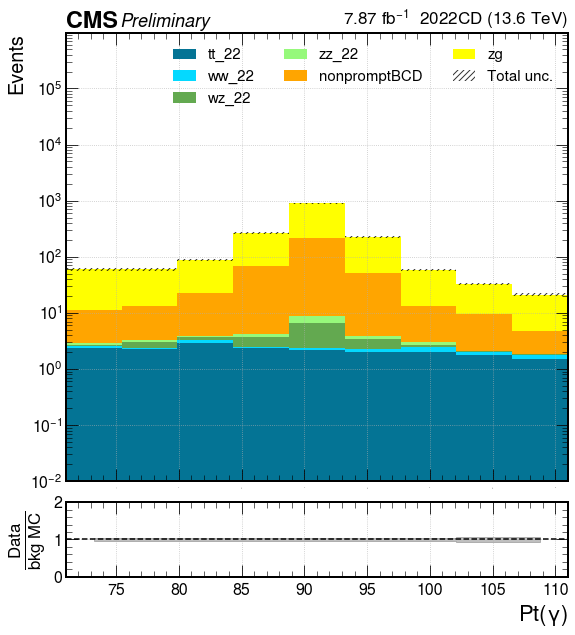

In [131]:
#tesing plot
arrays={
    # k: event_final_2[k]['photon_pt'][:,0] for k in event_final_2
    # k: event_final_2[k]['photon_pt'] for k in event_final_2
    k: event_final_2[k]['mu_mass'] for k in event_final_2 if 'data' not in k
    # k: event_final_2[k]['ele_mass'] for k in event_final_2 if 'data' not in k
}
# data_mc_compare_plot(arrays, weight=weight, plot_name='pt_gamma', x_name=r'$P_T \gamma$', x_max=111, x_min=71, bins=8, year='2022FG', density=True,overflow=True)
# data_mc_compare_plot(arrays, weight=weight, plot_name='photon_pt', x_name=r'$Pt (\gamma)$', x_max=450, x_min=0, bins=9, year='2022CD', density=True,overflow=True)#x_max=450, x_min=100,
data_mc_compare_plot(arrays, weight=weight, plot_name='photon_pt', x_name=r'$Pt (\gamma)$', x_max=111, x_min=71, bins=9, year='2022CD', density=True,overflow=True)#x_max=450, x_min=100,

### 保存root

In [132]:
import boost_histogram as bh
import uproot
import numpy as np

# 设置bins，不包括underflow和overflow
bins = [71, 76, 81,86,91,96,101,106,111]
# bins = [0,50,100,150,200,250, 300, 350, 400, 450]
# 创建ROOT文件
with uproot.recreate("datacard_mu.root") as f:
# with uproot.recreate("datacard_ele.root") as f:

    zg_combined_data = []  # 存放所有zg样本的数据
    zg_combined_weights = []  # 存放所有zg样本的权重

    # 对于event_final_2中的每个key
    for key, values in event_final_2.items():
        if key == 'data':
            continue

        # 对于zg样本，将它们的数据和权重存储在列表中以便后续合并
        if key.startswith("zg"):
            zg_combined_data.extend(values['mu_mass'])
            # zg_combined_data.extend(values['ele_mass'])
            # zg_combined_data.extend(values['photon_pt'])
            zg_combined_weights.extend(weight[key])
            continue

        # 将所有大于等于450的数据点都设置为450
        data_to_fill = np.where(values['mu_mass'] >= 111, 110.9, values['mu_mass'])
        # data_to_fill = np.where(values['ele_mass'] >= 111, 110.9, values['ele_mass'])
        # data_to_fill = np.where(values['photon_pt'] >= 450, 449.9, values['photon_pt'])
        
        # 创建boost_histogram直方图，并明确指定使用underflow和overflow bins
        hist = bh.Histogram(bh.axis.Regular(len(bins) - 1, bins[0], bins[-1], underflow=True, overflow=True))
        
        # 使用photon_pt和对应的权重填充直方图
        hist.fill(data_to_fill, weight=weight[key])
        
        # 将boost_histogram直方图转换为TH1并保存到ROOT文件中
        f[f"{key}_central_value"] = hist.to_numpy()
    
    # 对zg样本进行捏合并保存
    zg_combined_data = np.where(np.array(zg_combined_data) >= 111, 110.9, np.array(zg_combined_data))
    # zg_combined_data = np.where(np.array(zg_combined_data) >= 450, 449.9, np.array(zg_combined_data))
    zg_hist = bh.Histogram(bh.axis.Regular(len(bins) - 1, bins[0], bins[-1], underflow=True, overflow=True))
    zg_hist.fill(zg_combined_data, weight=np.array(zg_combined_weights))
    f["zg_central_value"] = zg_hist.to_numpy()


In [133]:
import boost_histogram as bh
import uproot
import numpy as np

bins = [71, 76, 81,86,91,96,101,106,111]
# bins = [0,50,100,150,200,250, 300, 350, 400, 450]

# 创建ROOT文件
with uproot.update("datacard_mu.root") as f:
# with uproot.update("datacard_ele.root") as f:

    # 对于event_final_2中的每个key
    for key, values in event_final_2.items():
        if key != 'data':
            continue

        # 将所有大于等于450的数据点都设置为450
        # data_to_fill = np.where(values['photon_pt'][:, 0] >= 450, 449.9, values['photon_pt'][:, 0])
        data_to_fill = np.where(values['mu_mass'] >= 111, 110.9, values['mu_mass'])
        # data_to_fill = np.where(values['ele_mass'] >= 111, 110.9, values['ele_mass'])
        
        # 创建boost_histogram直方图，并明确指定使用underflow和overflow bins
        hist = bh.Histogram(bh.axis.Regular(len(bins) - 1, bins[0], bins[-1], underflow=True, overflow=True))
        
        # 使用photon_pt和对应的权重填充直方图
        hist.fill(data_to_fill)
        
        # 将boost_histogram直方图转换为TH1并保存到ROOT文件中
        f[f"{key}_central_value"] = hist.to_numpy()



## 出图

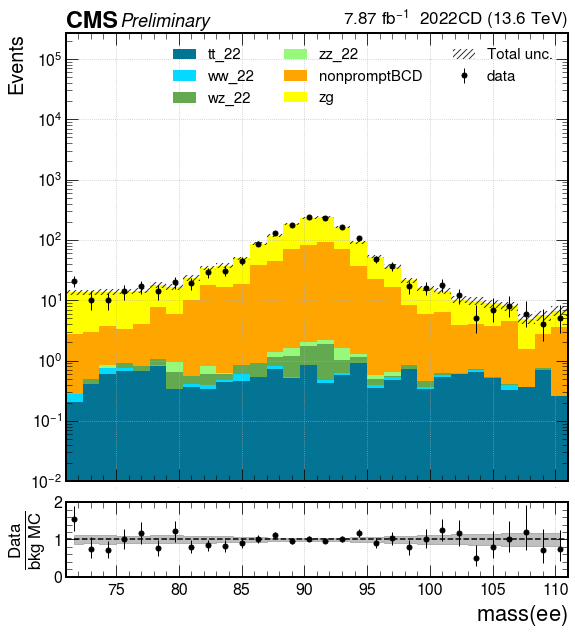

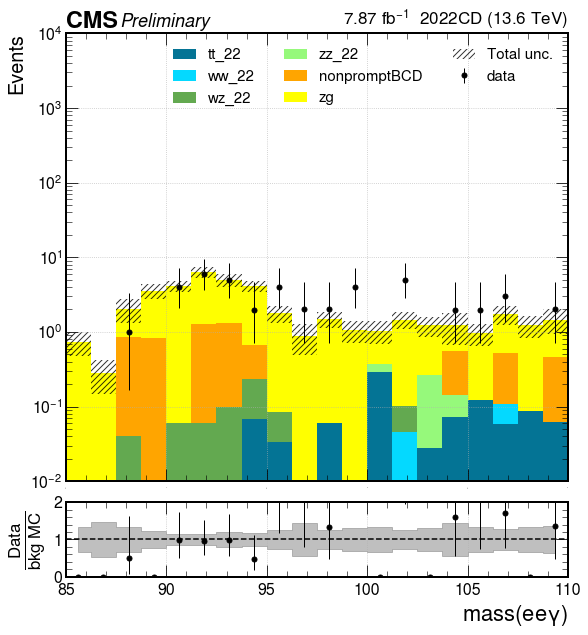

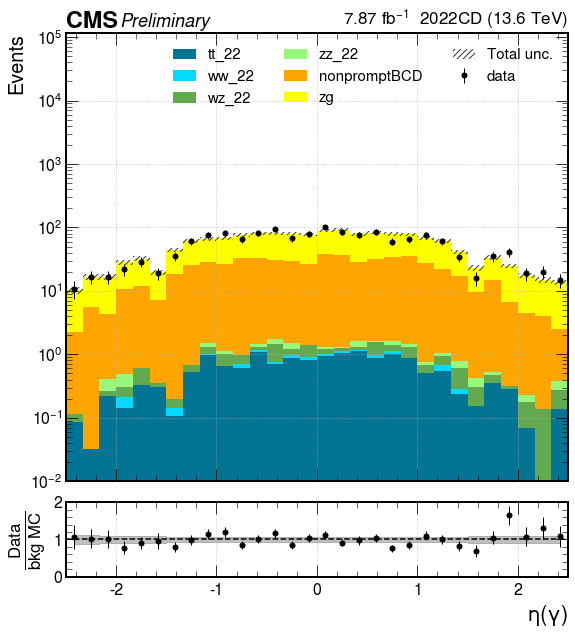

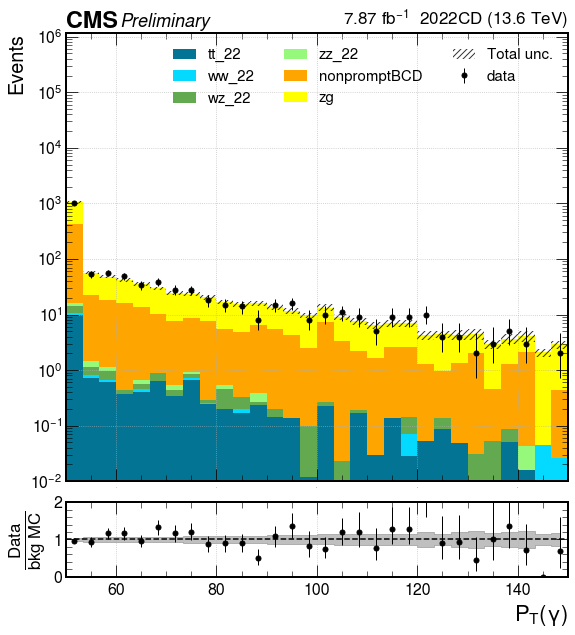

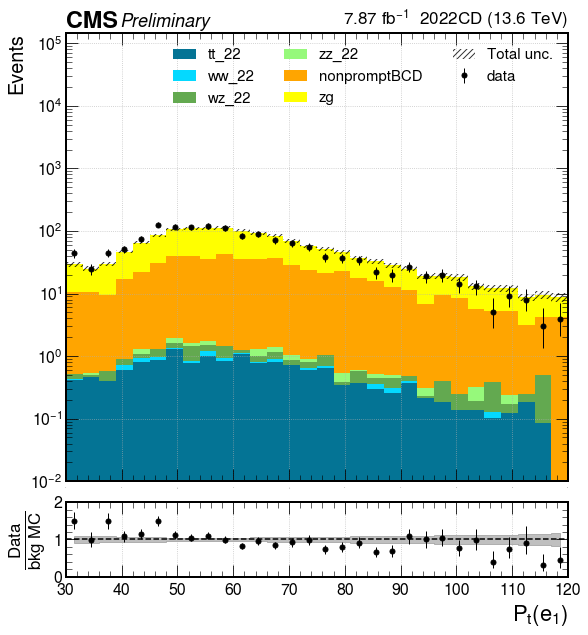

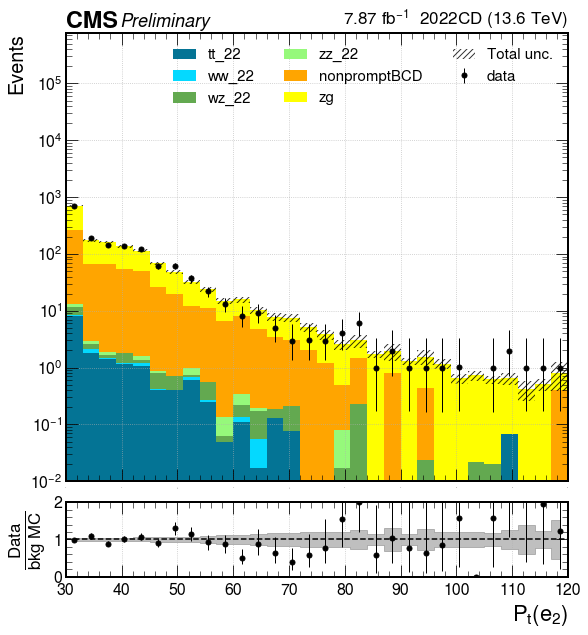

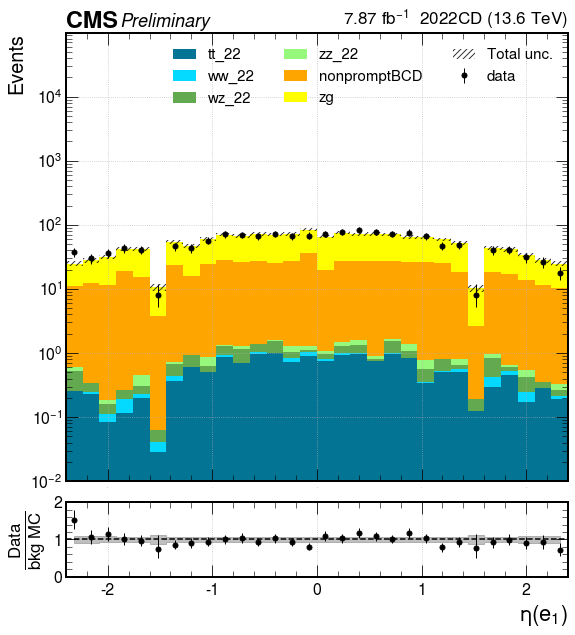

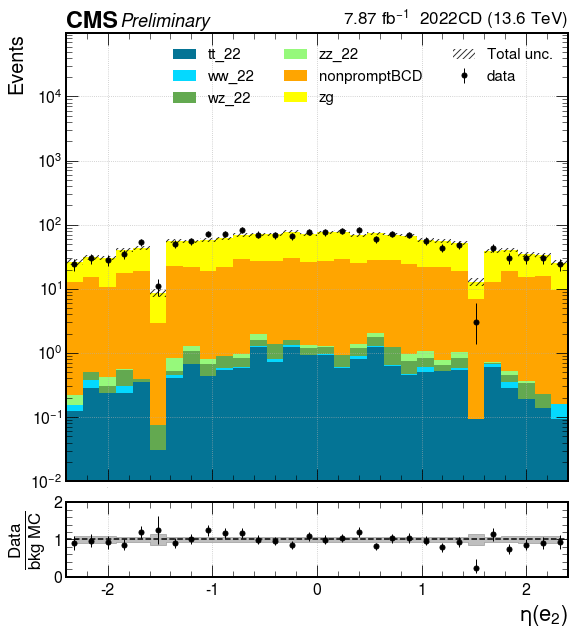

In [58]:
#plot all
plot_info = [
    ('ele_mass', r'$mass (ee)$', 'ele_mass', 71, 111, 30, False),
    ('gee_mass', r'$mass (ee \gamma)$', 'gee_mass', 85, 110, 20, True),
    ('photon_eta', r'$\eta (\gamma)$', 'photon_eta', -2.5, 2.5, 30, False),
    ('photon_pt', r'$P_T (\gamma)$', 'photon_pt', 50, 150, 30, False),
    ('ele1_pt', r'$P_t (e_1)$', 'ele1_pt', 30, 120, 30, False),
    ('ele2_pt', r'$P_t (e_2)$', 'ele2_pt', 30, 120, 30, False),
    ('ele1_eta', r'$\eta (e_1)$', 'ele1_eta', -2.4, 2.4, 30, False),
    ('ele2_eta', r'$\eta (e_2)$', 'ele2_eta', -2.4, 2.4, 30, False),
    # ('dr_lg',r'$\delta R(l\gamma)$','dr_lg',0.5, 1.5, 30, True)
]

for plot_name, x_name, var_name, x_min, x_max, bins, is_photon in plot_info:
    arrays = {k: event_final_2[k][var_name] for k in event_final_2}
    if is_photon:
        arrays = {k: v[:, 0] for k, v in arrays.items()}
    
    data_mc_compare_plot(arrays, weight=weight, plot_name=plot_name, x_name=x_name, x_min=x_min, x_max=x_max, bins=bins, year='2022CD', density=True, underflow=True,overflow=False)


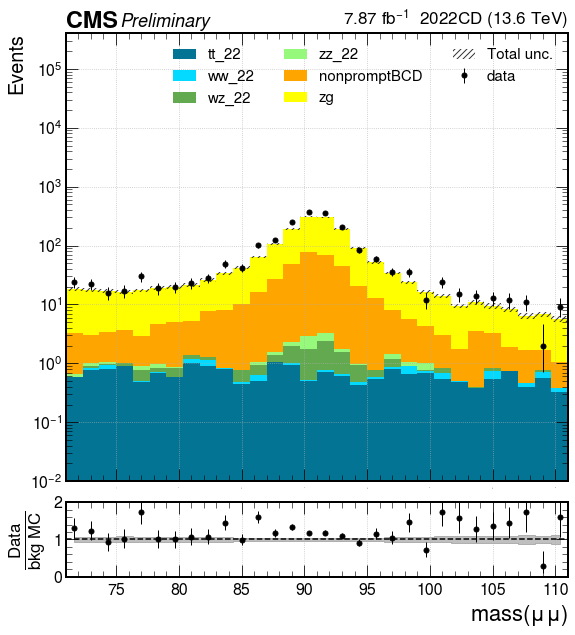

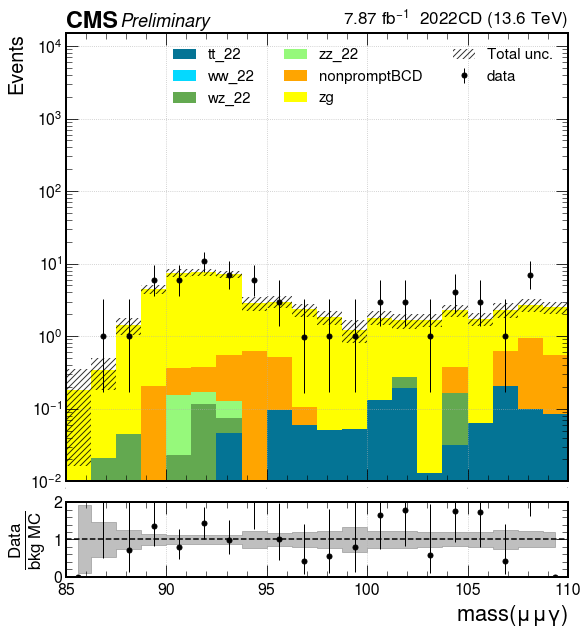

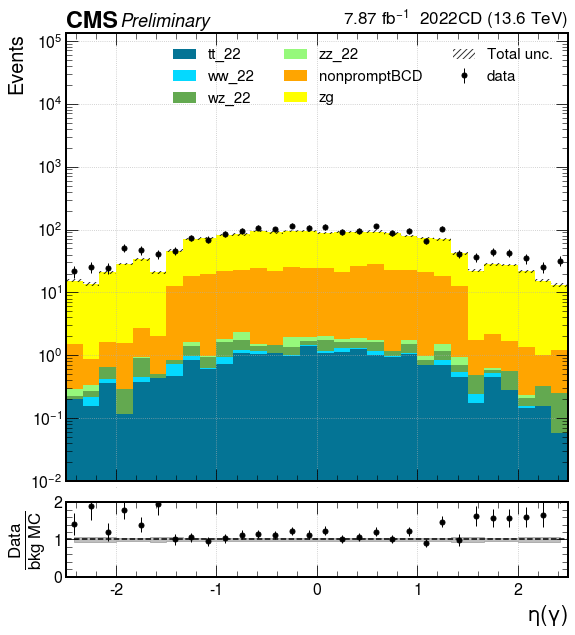

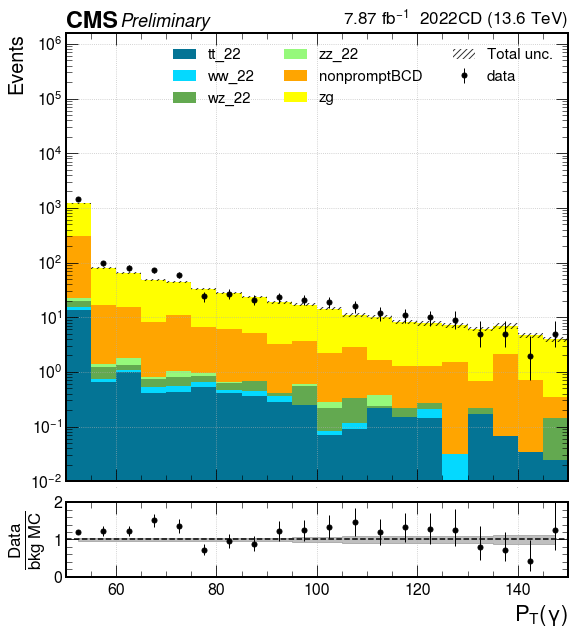

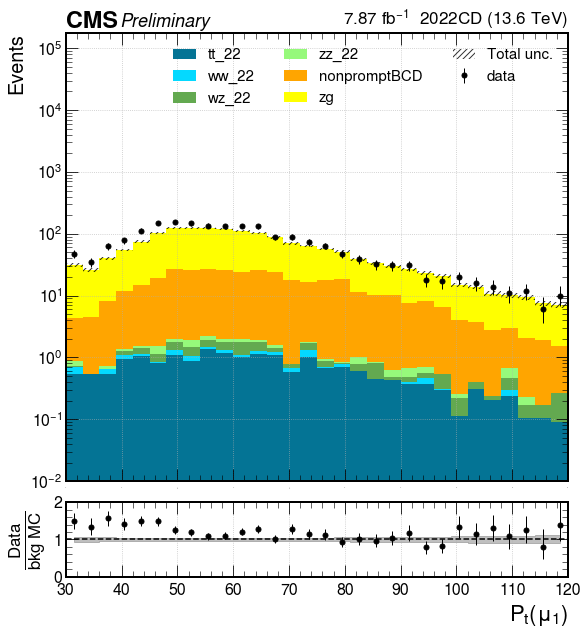

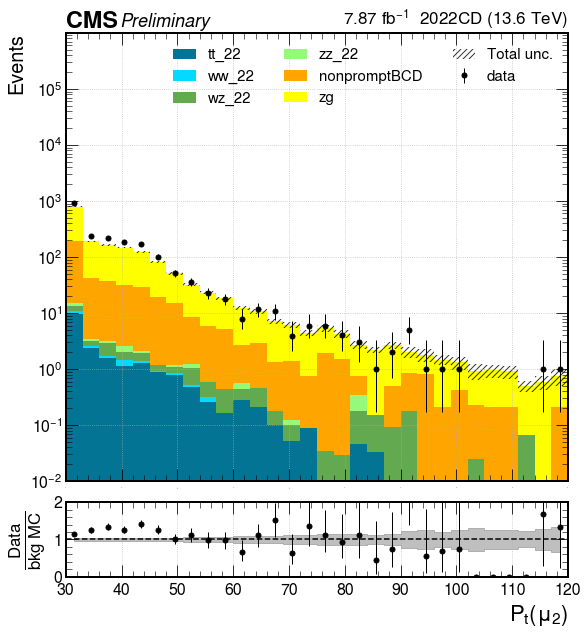

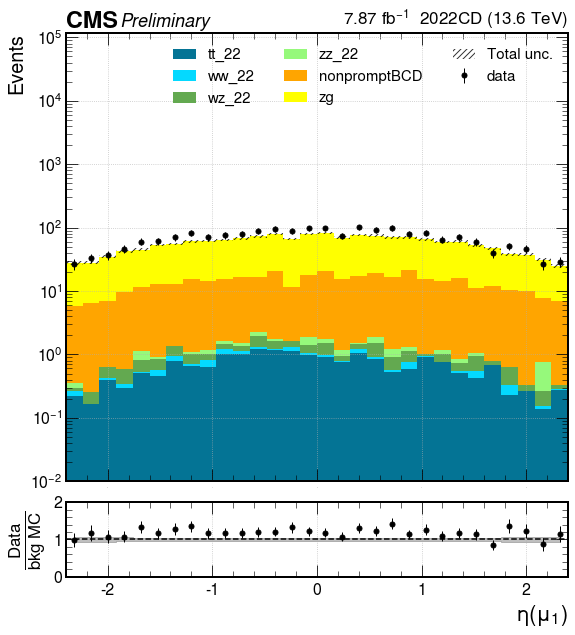

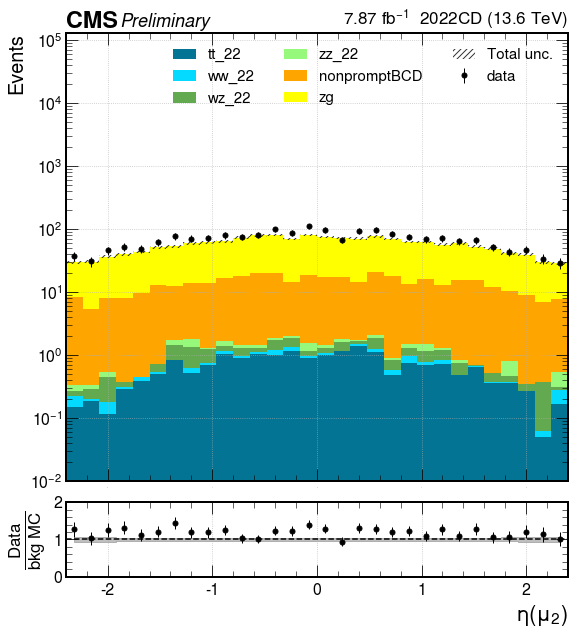

In [48]:
#plot all
plot_info = [
    ('mu_mass', r'$mass (\mu \mu)$', 'mu_mass', 71, 111, 30, False),
    ('gmumu_mass', r'$mass (\mu \mu \gamma)$', 'gmumu_mass', 85, 110, 20, False),
    ('photon_eta', r'$\eta (\gamma)$', 'photon_eta', -2.5, 2.5, 30, False),
    ('photon_pt', r'$P_T (\gamma)$', 'photon_pt', 50, 150, 20, False),
    ('muon1_pt', r'$P_t (\mu_1)$', 'muon1_pt', 30, 120, 30, False),
    ('muon2_pt', r'$P_t (\mu_2)$', 'muon2_pt', 30, 120, 30, False),
    ('muon1_eta', r'$\eta (\mu_1)$', 'muon1_eta', -2.4, 2.4, 30, False),
    ('muon2_eta', r'$\eta (\mu_2)$', 'muon2_eta', -2.4, 2.4, 30, False),
    # ('dr_lg',r'$\delta R(l\gamma)$','dr_lg',0.5, 1.5, 30, True)
]

for plot_name, x_name, var_name, x_min, x_max, bins, is_photon in plot_info:
    arrays = {k: event_final_2[k][var_name] for k in event_final_2}
    if is_photon:
        arrays = {k: v[:, 0] for k, v in arrays.items()}
    
    data_mc_compare_plot(arrays, weight=weight, plot_name=plot_name, x_name=x_name, x_min=x_min, x_max=x_max, bins=bins, year='2022CD', density=True, underflow=True,overflow=False)


## nTGC

In [25]:
event_final_2 = {
    'data':event_final['data'],
    'tt':event_final['tt'],
    'ww':event_final['ww'],
    'wz':event_final['wz'],
    'zz':event_final['zz'],
    # 'nonpromptCD':event_final['nonpromptCD'],
    'nonpromptBCD_barrel':event_final['nonpromptBCD_barrel'],
    'nonpromptBCD_endcap':event_final['nonpromptBCD_endcap'],
    'zg0':event_final['zg0'],
    'zg1':event_final['zg1'],
    'zg2':event_final['zg2'],
    'zg3':event_final['zg3'],
}

In [38]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep as hep
import boost_histogram as bh
from cycler import cycler

use_helvet = False ## true: use helvetica for plots, make sure the system have the font installed
if use_helvet:
    CMShelvet = hep.style.CMS
    CMShelvet['font.sans-serif'] = ['Helvetica', 'Arial']
    plt.style.use(CMShelvet)
else:
    plt.style.use(hep.style.CMS)

def flow(hist: bh.Histogram, overflow: bool=True, underflow: bool=False):
    h, var = hist.view(flow=(overflow | underflow)).value, hist.view(flow=(overflow | underflow)).variance
    if overflow: # h, var also include underflow bins but in plots usually no underflow data
        # And we've filled None with -999, so we shouldn't show underflow data (mostly from filled None)
        h[-2] += h[-1]; var[-2] += var[-1]
    if underflow:
        h[1] += h[0]; var[1] += var[0]
    if overflow or underflow:
        h, var = h[1:-1], var[1:-1]
    return h, var

def error_bar(h, var, type='data'):
    from scipy.interpolate import CubicSpline
    if type == 'data':
        number = h
    elif type == 'mc':  # h = k*N, var = k^2*N, std = k*sqrt(N)
        number = h**2 / var
    else:
        raise ValueError("type should be 'data' or 'mc'! ")
    center = range(11)
    up = np.array([1.84, 3.30, 4.64, 5.92, 7.16, 8.38, 9.58, 10.77, 11.95, 13.11, 14.27]) - center
    down = center - np.array([0, 0.17, 0.71, 1.37, 2.09, 2.84, 3.62, 4.42, 5.23, 6.06, 6.89])
    cs_up = CubicSpline(x=center, y=up)
    cs_down = CubicSpline(x=center, y=down)
    
    Garwood = (number>0)&(number<10)
    poison_error_bar = np.sqrt(number)
    up_error_bar = np.copy(poison_error_bar)
    down_error_bar = np.copy(poison_error_bar)
    up_error_bar[Garwood] = cs_up(number[Garwood])
    down_error_bar[Garwood] = cs_down(number[Garwood])
    if type == 'mc':
        up_error_bar *= var/h
        down_error_bar *= var/h
    return np.array([down_error_bar, up_error_bar])

#weight={y: {c: events[y][c].event_weight for c in events[y] if c!='data' and len(events[y][c])>0} for y in events}


In [15]:
from matplotlib.cm import get_cmap
from matplotlib.ticker import ScalarFormatter

hep.style.use("CMS")
#mpl.rcParams['axes.prop_cycle'] = cycler(color=get_cmap("tab20").colors)
#print(plt.rcParams['axes.prop_cycle'].by_key()['color'])
bin_edges = [200.,300., 400., 500., 600., 800., 1000.]


def data_mc_compare_plot(arrays, weight, plot_name: str, x_name: str, cuts=None, year='run3', bins=None, x_min=None, x_max=None, density=False, overflow=True, underflow=False, fraction_log=False):
    # ...
    if bins is not None:
        bin_edges = bins
        n_bins = len(bin_edges) - 1
    else:
        bin_edges = np.linspace(x_min, x_max, num=40+1)  # Use 40 evenly spaced bins if no bin edges are provided
        n_bins = 40


#def data_mc_compare_plot(arrays, weight, plot_name: str, x_name: str, cuts=None, year='2022', bins=bins_arr, x_min=0, x_max=2000, density=False, overflow=True, underflow=False, fraction_log=False):
    density = False
#    bin_width = (x_max-x_min)/bins
    if cuts:
        arrays = {k: v[cuts[k]] for k, v in arrays.items()}
      
    ## canvas initializing
    f = plt.figure(figsize=(9, 10))
    gs = mpl.gridspec.GridSpec(1, 1)
    ax = f.add_subplot(gs[0])
    plt.grid()
    hep.cms.label(data=True, year=year, ax=ax, lumi=LUMI[year], fontsize=18, llabel='Preliminary')
#    hep.cms.label(data=True, year=year, ax=ax, lumi="4.5 fb^{-1} (13.6 TeV)", fontsize=18, llabel='Preliminary')

    
    ## analyze
    stacked = {'h': {}, 'var': {}}
    individual = {'h': {}, 'var': {}}
    bkg_total_err = np.zeros(n_bins)


     

    for (k,v) in arrays.items():
#        hist = bh.Histogram(bh.axis.Regular(bins, x_min, x_max), storage=bh.storage.Weight())
        hist = bh.Histogram(bh.axis.Variable(bin_edges), storage=bh.storage.Weight())
        values = ak.fill_none(v, -999)
        
#        if k!='data' and k!= 'nonprompt' and weight is not None:
        if 'data' not in k and weight is not None:
            hist.fill(values, weight=weight[k])
            print(k,hist)
#            if k=='nonprompt':
        else:
            hist.fill(values)
            print(k,hist)

        
        h, var = flow(hist=hist, overflow=overflow, underflow=underflow)
        
        if k in BKG: 
            stacked['h'][k] = h
            stacked['var'][k] = var
            print(k,var)
            bkg_total_err += var
        else:
            individual['h'][k] = h
            individual['var'][k] = var
            
    bkg_total_err = np.sqrt(bkg_total_err)
    ## plot
    # mpl.rcParams['axes.prop_cycle'] = cycler(color=['darkorange', 'cyan', 'HotPink', 'darkviolet', 'SlateGray', 'black', 'LightSkyBlue'])
#    SIG_COLOR={'zg': 'red'}
    # or you can specify color='blue' in the above function to cover colorlist (you could comment out colorlist too)
    if len(stacked['h'].keys())>0:
        hep.histplot(list(stacked['h'].values()), bins=hist.axes[0].edges, label=list(stacked['h'].keys()), histtype='fill', density=density, stack=True, linewidth=2, ax=ax)
        bkg_h = np.sum(list(stacked['h'].values()), axis=0)
        # we usually don't care error of background MC cuz the stats is very large (relative error is very small compared with signal and data)

    #   绘制 MC 统计不确定性的阴影区域
        x_centers = (hist.axes[0].edges[:-1] + hist.axes[0].edges[1:]) / 2
        # 添加一个额外的值到 bkg_h 和 bkg_total_err
        bkg_h_extended = np.concatenate([bkg_h, [bkg_h[-1]]])
        bkg_total_err_extended = np.concatenate([bkg_total_err, [bkg_total_err[-1]]])
        # 使用扩展的数组作图
        ax.fill_between(bin_edges, bkg_h_extended - bkg_total_err_extended, bkg_h_extended + bkg_total_err_extended, facecolor='none', edgecolor='black', hatch='////', linewidth=0.0, alpha=0.8, step='post', label='MC stat. unc.')

    for (k,h) in individual['h'].items():
        if 'data' in k:
            err = error_bar(h, individual['var'][k], type='data')
            hep.histplot(h, bins=hist.axes[0].edges, yerr=err, label=k, color='black', histtype='errorbar', density=density, stack=False, ax=ax)
#            print(k,hist,err)
    #        hep.histplot(h/bkg_h, bins=hist.axes[0].edges, yerr=err/bkg_h, color='black', histtype='errorbar', density=density, stack=False, ax=ax1)
        elif k == 'nonprompt':
            err = error_bar(h, individual['var'][k], type='data')
            hep.histplot(h, bins=hist.axes[0].edges, yerr=err, label=k, histtype='step', density=density, stack=False, linewidth=2, ax=ax, color=SIG_COLOR[k])
#            print(k,hist,err)
        else:  # signal
            err = error_bar(h, individual['var'][k], type='mc')
            hep.histplot(h, bins=hist.axes[0].edges, yerr=err, label=k, histtype='step', density=density, stack=False, linewidth=2, ax=ax, color=SIG_COLOR[k])
            y = h / np.sqrt(bkg_h + 1)
#            print(k,hist,err)
    #        hep.histplot(y, bins=hist.axes[0].edges, yerr=err/np.sqrt(bkg_h+1), label=k, histtype='step', density=density, stack=False, ax=ax2, color=SIG_COLOR[k])

    ## axises
    ax.set_xlim(x_min, x_max)
    # ax.set_xticklabels([])
    ax.set_ylim(0.01 if not density else 0, ax.get_ylim()[1]*(1e3 if not density else 1.2))

    
    if not density:
        ax.set_yscale('log')
#    ax.ticklabel_format(useOffset=False, style='scientific')
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.tick_params(axis='x', which='major', labelsize=0)

    if density==False:
        ax.set_ylabel('Events', fontsize=20, ha='right', y=1)
    elif density==True:    
        ax.set_ylabel('A.U.', fontsize=20, ha='right', y=1)


    plt.xticks(size=16)
    plt.yticks(size=16)
    
    ax.set_xlabel(x_name, fontsize=22, ha='right', x=1)

    ## title, text and legend
    # plt.title('ROC Curve of HWW4q vs. QCD', fontsize=24,color="black")
    ax.legend(loc="best", ncol=3, frameon=False, fontsize=15)
    # plt.text(0.96*ax.get_xlim()[1], ax.get_ylim()[1]*0.72,"At "+r"$\mathrm{m^{gen}_{H}=}$"+f"{Higgsmass} GeV", fontsize=24, color="black", ha='right')
    ax.set_ylim(0.001,15000)
    ax.set_xlim(200,1000)
    ## finalizing
    suffix = '_AU' if density else ''
    if not os.path.exists('./plots'):
        os.makedirs('./plots')
    plt.savefig(f"./plots/{year}_{plot_name}{suffix}_nTGC.pdf", bbox_inches='tight')
    plt.show()

In [16]:
#tesing plot
arrays={
    k: event_final_2[k]['photon_pt'][:,0] for k in event_final_2 
}
data_mc_compare_plot(arrays, weight, plot_name="test_plot", x_name="$P_T (\gamma)$", bins=bin_edges,year='2022FG', density=True, underflow=True)

#data_mc_compare_plot(arrays, weight=weight, plot_name='photon_pt', x_name=r'$P_T (\gamma)$', x_max=500, x_min=60,  bins=15,year='2022', density=True, underflow=True)

NameError: name 'weight' is not defined

## FSR

/tmp/ipykernel_1941593/1032871220.py:16: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_under('white')


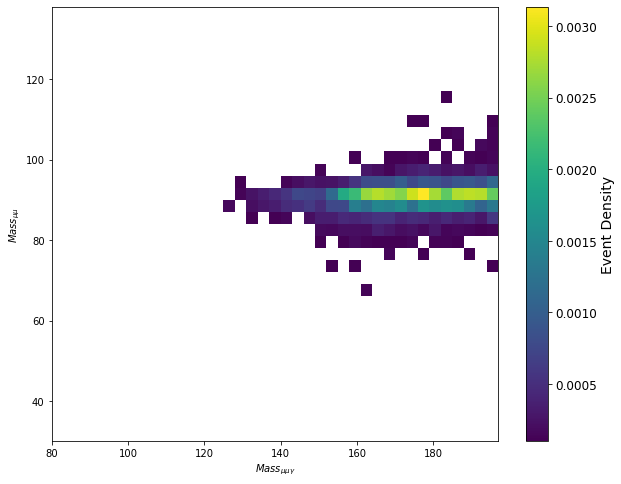

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

# 创建二维直方图
plt.figure(figsize=(10, 8))

# 使用归一化的方式
#counts, xedges, yedges, im = plt.hist2d(event_final['data']['gmumu_mass'],event_final['data']['muon_mass'], 
counts, xedges, yedges, im = plt.hist2d(event_final['zg1']['gmumu_mass'],event_final['zg1']['muon_mass'], 
                                        bins=[np.arange(80, 200, 3), np.arange(30, 140, 3)], 
                                        cmap='viridis', density=True)

# 创建一个新的colormap，将密度为0的部分设为白色
cmap = plt.cm.viridis
cmap.set_under('white')

# 使用新的colormap
im.set_cmap(cmap)

# 为图像设置最小可见值（小于这个值的部分将被cmap的set_under方法影响）
im.set_clim(0.0001)

# 显示色标
cbar = plt.colorbar(im, label='Event Density')
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Event Density', size=14)

plt.xlabel('$Mass_{\mu\mu\gamma}$')
plt.ylabel('$Mass_{\mu\mu}$')

plt.show()


/tmp/ipykernel_205944/4262816858.py:18: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_under('white')


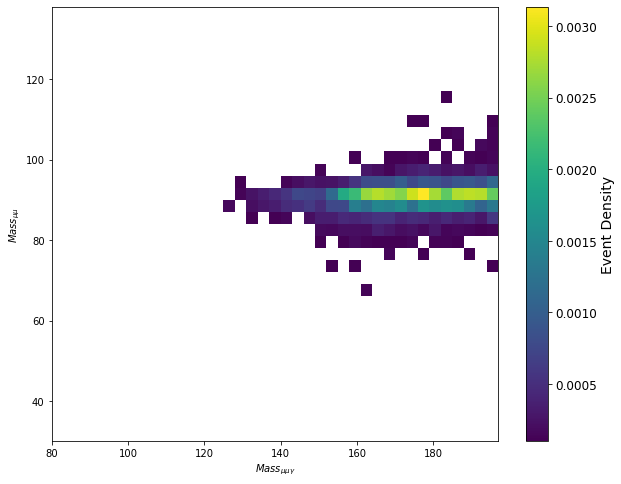

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

# 创建一个布尔数组，其中满足条件的位置是True，不满足的是False
mask = ak.any(event_final['zg1']['pdgid']==22,axis=1)

# 创建二维直方图
plt.figure(figsize=(10, 8))

# 使用归一化的方式
counts, xedges, yedges, im = plt.hist2d(event_final['zg1']['gmumu_mass'][mask], event_final['zg1']['muon_mass'][mask], 
                                        bins=[np.arange(80, 200, 3), np.arange(30, 140, 3)], 
                                        cmap='viridis', density=True)

# 创建一个新的colormap，将密度为0的部分设为白色
cmap = plt.cm.viridis
cmap.set_under('white')

# 使用新的colormap
im.set_cmap(cmap)

# 为图像设置最小可见值（小于这个值的部分将被cmap的set_under方法影响）
im.set_clim(0.0001)

# 显示色标
cbar = plt.colorbar(im, label='Event Density')
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Event Density', size=14)

plt.xlabel('$Mass_{\mu\mu\gamma}$')
plt.ylabel('$Mass_{\mu\mu}$')

plt.show()


/tmp/ipykernel_1941593/1747067208.py:36: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_under('white')


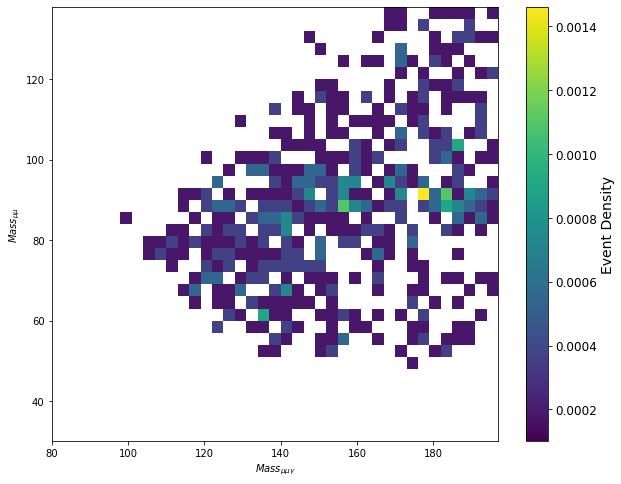

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import awkward as ak

# 创建二维直方图
plt.figure(figsize=(10, 8))

# 待绘制的样本列表
keys_to_plot = ['zg1', 'zg2', 'zg3', 'tt', 'zz', 'ww', 'wz']

# 初始化两个空的列表，用于存放所有样本的gmumu_mass和muon_mass数据
all_gmumu_mass = []
all_muon_mass = []

for key in keys_to_plot:
    current_data = event_final[key]
    
    pdg_ids = current_data['pdgid'][current_data['MotherIdx'][current_data['photonIdx']]]
    mask = (np.abs(pdg_ids) == 11) | (np.abs(pdg_ids) == 13)
    test = ak.flatten(mask)
    
    gmumu_mass = ak.to_numpy(current_data['gmumu_mass'][test])
    muon_mass = ak.to_numpy(current_data['muon_mass'][test])
    
    all_gmumu_mass.extend(gmumu_mass)
    all_muon_mass.extend(muon_mass)

# 使用归一化的方式绘制所有样本的数据
counts, xedges, yedges, im = plt.hist2d(all_gmumu_mass, all_muon_mass, 
                                        bins=[np.arange(80, 200, 3), np.arange(30, 140, 3)], 
                                        cmap='viridis', density=True)

# 创建一个新的colormap，将密度为0的部分设为白色
cmap = plt.cm.viridis
cmap.set_under('white')

# 使用新的colormap
im.set_cmap(cmap)

# 为图像设置最小可见值（小于这个值的部分将被cmap的set_under方法影响）
im.set_clim(0.0001)

# 显示色标
cbar = plt.colorbar(im, label='Event Density')
cbar.ax.tick_params(labelsize=12)
cbar.set_label('Event Density', size=14)

plt.xlabel('$Mass_{\mu\mu\gamma}$')
plt.ylabel('$Mass_{\mu\mu}$')

plt.show()
